# HW4

選擇的資料集：Electrical Grid Stability Simulated Data Data Set

網址：https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

In [1]:
import pandas as pd

In [2]:
egss = pd.read_csv("egss.csv")
egss.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


將資料讀入後可以看到有 14 個欄位，依據資料集的說明：11 predictive attributes, 1 non-predictive(p1), 2 goal fields

希望用 11 個 predictive attributes 去預測資料是 stable 或是 unstable

In [5]:
egss.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

首先觀察資料集中各欄位的資料型態，可以發現只有 stabf 並不是數值型態，必須先把它轉為數值形態才能進行運算

In [6]:
egss['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

可以看到其中只有二種不同的值，因此這裡把 unstable 變為 0 而 stable 變為 1

In [7]:
egss['stabf'] = egss['stabf'].map({'unstable':0, 'stable':1})
egss.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [8]:
egss.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf      int64
dtype: object

再觀察一次資料型態，全部都已經是數值了

接著去除 non-predictive 的資料即欄位 p1 以及用不到的欄位 stab

In [9]:
egss = egss.drop(['p1'],axis=1)
egss = egss.drop(['stab'],axis=1)
egss.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


接著將預測用的屬性 x 與結果 y 分離

In [11]:
x = egss.drop(['stabf'], axis=1)
y = egss['stabf']

In [12]:
x.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [13]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

使用 sklearn 中提供的函式切割訓練資料與測試資料，這裡比例為 7:3

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [18]:
x_train.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4
8719,0.836740,4.268490,1.120114,3.326430,-0.518277,-1.089763,-0.803705,0.236426,0.548451,0.599908,0.527154
1370,1.453148,6.273323,5.379078,8.825669,-0.587962,-1.045628,-0.980072,0.239726,0.126579,0.584335,0.416648
4912,8.837833,4.678568,0.879592,9.761313,-1.615902,-1.563316,-0.543721,0.413676,0.141702,0.201490,0.138522
7197,7.300787,1.780213,8.598132,2.376403,-0.644550,-0.942931,-1.349433,0.922833,0.906475,0.246198,0.118392
8434,9.734150,9.259595,6.812908,9.740369,-1.949911,-1.709417,-1.108218,0.742259,0.936244,0.405062,0.980083


In [19]:
x_test.head()

,tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4
2138,0.579964,9.676125,5.585510,9.713910,-1.677305,-1.754954,-1.679836,0.162826,0.590928,0.171275,0.557573
8295,3.612626,2.900546,6.425743,1.029113,-1.602054,-1.515735,-1.663683,0.938757,0.678149,0.418222,0.739659
4571,8.131989,1.109948,4.396144,9.598455,-1.006557,-1.920640,-1.170536,0.329224,0.133410,0.887843,0.827792
1088,8.155507,3.642221,4.944230,3.278350,-1.075482,-1.917065,-1.703241,0.653701,0.116767,0.880823,0.175142
4933,2.938262,2.594026,3.916269,8.944268,-1.560629,-1.498070,-0.819480,0.813554,0.137448,0.521178,0.552121


In [20]:
y_train.head()

8719    1
1370    1
4912    1
7197    0
8434    0
Name: stabf, dtype: int64

In [21]:
y_test.head()

2138    0
8295    0
4571    0
1088    0
4933    1
Name: stabf, dtype: int64

到此資料的前處理已經做完了，可以開始套用模型了

這個問題屬於分類問題，因此接下來將使用之前教過的以及一些網路上的資料中介紹過得分類器

## Perceptron

第一個嘗試使用 Perceptron，這是一個很早就被開發出來的神經網路，可以用在二元線性分類中

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics

首先標準化資料

In [35]:
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [36]:
x_train_std

array([[-1.60652665, -0.36184357, -1.5079979 , ...,  0.0920484 ,
         0.28921552,  0.0142025 ],
       [-1.38191945,  0.37148283,  0.04445423, ..., -1.45081976,
         0.23254834, -0.38768337],
       [ 1.30891608, -0.21184539, -1.59567147, ..., -1.39551146,
        -1.16050543, -1.3991687 ],
       ...,
       [-0.17585213,  1.0681675 ,  0.03706928, ..., -0.19954133,
        -1.54550886,  0.86411163],
       [ 0.69045978,  1.45373661, -1.20186753, ...,  1.67899039,
         1.13165492,  0.22552745],
       [ 0.87297165,  0.9900588 , -1.67574234, ..., -0.11165112,
        -1.51706311, -0.86110516]])

In [37]:
x_test_std

array([[-1.7000909 ,  1.6161576 ,  0.11970161, ...,  0.24739543,
        -1.27044715,  0.12483059],
       [-0.59504776, -0.86220919,  0.42597822, ...,  0.56637958,
        -0.37188393,  0.78703821],
       [ 1.05172045, -1.51717294, -0.31383919, ..., -1.42583992,
         1.33692137,  1.10756004],
       ...,
       [-1.40005574,  0.56637265, -1.01988441, ...,  0.20370628,
        -1.56617114,  1.38716262],
       [ 0.87895979, -1.33443139, -0.49633371, ...,  0.94695002,
         1.49171059, -1.44892227],
       [-0.02968525,  0.60417147, -0.24331631, ...,  0.84833317,
        -1.28304636, -0.85926887]])

嘗試讓 perceptron 迭代 100 次

In [38]:
p=Perceptron(n_iter=100).fit(x_train_std,y_train)
train_preds = p.predict(x_train)
test_preds = p.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.6375714285714286
Test accuracy: 0.639


/usr/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


結果不算太好，如果迭代次數增加呢？這次嘗試 10000 次

In [40]:
p=Perceptron(n_iter=10000).fit(x_train_std,y_train)
train_preds = p.predict(x_train)
test_preds = p.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

/usr/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Train accuracy: 0.6375714285714286
Test accuracy: 0.639


完全沒有變化......

目前看來 perceptron 準確度不高，可能是因為 perceptron 只適合於線性關係明顯的資料，改為採用之前教過的 Logistic Regression 看看效果

## Logistic Regression

在 sklean 中實現了四個 solver，有 ‘newton-cg’, ‘sag’, ‘saga’, ‘lbfgs’ ，分別嘗試看看

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics, model_selection
clf = LogisticRegression(solver='newton-cg').fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8191428571428572
Test accuracy: 0.8106666666666666


In [43]:
clf = LogisticRegression(solver='sag').fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8191428571428572
Test accuracy: 0.8106666666666666


In [44]:
clf = LogisticRegression(solver='saga').fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.819
Test accuracy: 0.811


/usr/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [45]:
clf = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8191428571428572
Test accuracy: 0.8106666666666666


可以看到 Logistic Regression 的準確度相較 perceptron 高出不少，但 Logistic Regression 中四個 solver 效果差不多

接著嘗試 SVM

## SVM

一樣先標準化資料

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [48]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8187142857142857
Test accuracy: 0.812


似乎跟 Logistic Regression 差不多，試著調整 penalty 看看效果

In [49]:
penalty = 0.1

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8187142857142857
Test accuracy: 0.8123333333333334


In [50]:
penalty = 0.5

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8192857142857143
Test accuracy: 0.812


In [51]:
penalty = 1.0

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)

train_preds = svm.predict(x_train_std)
test_preds = svm.predict(x_test_std)
train_acc = metrics.accuracy_score(y_train, train_preds)
test_acc = metrics.accuracy_score(y_test, test_preds)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.8192857142857143
Test accuracy: 0.812


看起來沒啥差別，最後試試看 neural network 會不會有比較好的效果

## Neural Network

In [67]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

先 normalize ，避免網路無法收斂

In [68]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

設定參數，直接套用上一個作業的範例看看效果

In [69]:
hidden_units = 10    
activation = 'relu' 
l2 = 0.001          
learning_rate = 0.1  
epochs = 20          
batch_size = 32      

In [70]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=11,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

設定權重，避免因為資料集不平衡影響結果

In [71]:
stat = egss['stabf'].value_counts()
print(stat)

0    6380
1    3620
Name: stabf, dtype: int64


Epoch 1/10
7000/7000 [==============================] - 0s 66us/step - loss: 0.2983 - acc: 0.6849
Epoch 2/10
7000/7000 [==============================] - 0s 33us/step - loss: 0.2635 - acc: 0.7323
Epoch 3/10
7000/7000 [==============================] - 0s 35us/step - loss: 0.2428 - acc: 0.7606
Epoch 4/10
7000/7000 [==============================] - 0s 35us/step - loss: 0.2392 - acc: 0.7656
Epoch 5/10
7000/7000 [==============================] - 0s 31us/step - loss: 0.2372 - acc: 0.7706
Epoch 6/10
7000/7000 [==============================] - 0s 39us/step - loss: 0.2326 - acc: 0.7749
Epoch 7/10
7000/7000 [==============================] - 0s 39us/step - loss: 0.2372 - acc: 0.7660
Epoch 8/10
7000/7000 [==============================] - 0s 35us/step - loss: 0.2312 - acc: 0.7737
Epoch 9/10
7000/7000 [==============================] - 0s 32us/step - loss: 0.2305 - acc: 0.7787
Epoch 10/10
3000/3000 [==============================] - 0s 14us/step
Training accuracy: 0.8121428570747375
Testing ac

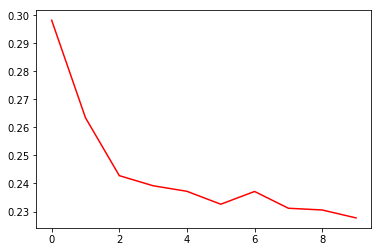

In [72]:
class_weight = {
    0: 1.,
    1: stat[1]/(stat[0] + stat[1])
}

history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: {}'.format(train_acc))
print('Testing accuracy: {}'.format(test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

這裡借用助教之前示範的函式訓練多次取平均

In [73]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [74]:
test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [01:17<00:00,  3.70s/it]

Avgerage Training Accuracy: 0.8106999999455043
Avgerage Testing Accuracy: 0.8053000000317893


看起來準確度並沒有提昇